# 1. Загрузка данных и библиотек

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data = pd.read_csv('Data/archive/Student Depression Dataset.csv')

In [32]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [33]:
data.shape

(27901, 18)

# 2. Первичный анализ и обработка данных

## 2.1 Рассмотрим соотношение количества меток целевой переменой 

In [34]:
print('depressed students %:', data[data['Depression'] == 1].shape[0]/data.shape[0] * 100)
print('not depressed students %:', data[data['Depression'] == 0].shape[0]/data.shape[0] * 100)

depressed students %: 58.549872764417046
not depressed students %: 41.450127235582954


Соотношение объектов целевого класса почти равное

In [35]:
data = data.drop(['id'], axis=1)

## 2.2 Рассмотрим категориальные признаки

In [36]:
data['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [38]:
# Удалим города представленные только 1 или 2 записями в данных
cities_to_remove = data['City'].value_counts()[data['City'].value_counts() < 400]
data = data[~data['City'].isin(cities_to_remove.index)]
data['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [39]:
# Рассмотрим столбец профессий
data['Profession'].value_counts()

Profession
Student                   27844
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [42]:
# Нас интересуют только студенты, поэтому оставим только их
data = data[data['Profession']=='Student']
data = data.drop(['Profession'], axis=1)

## 2.2 Рассмотрим распределение числовых признаков

In [22]:
numeric_columns = data.select_dtypes('number').drop(['Depression'], axis=1)

<Axes: >

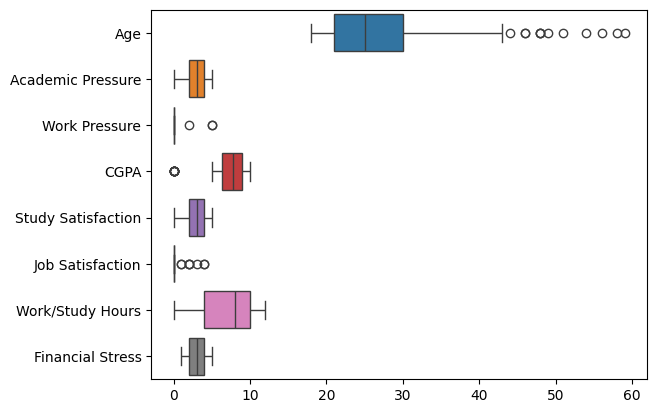

In [23]:
sns.boxplot(numeric_columns,orient="h")

Можно заметить, что в показатели AGE есть выбросы. Люди старше 30 лет не входят в рассматриваемую в исследовании группу. Так же они могут быть причиной отклонений в других признаках (Work Pressure, Job Satisfaction).    

In [24]:
data = data[data['Age'] <= 30]

<Axes: >

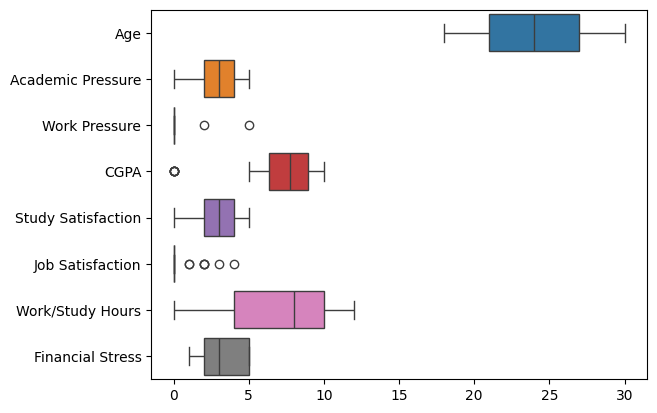

In [26]:
numeric_columns = data.select_dtypes('number').drop(['Depression'], axis=1)
sns.boxplot(numeric_columns,orient="h")